# PA Project - Team 5 : Code File 3/3
##Caglar Dogan - Ekantika Singh - Gurmehr Sohi

The code in this file reads the "model_data.csv" (which contains the information scraped from IMDB for each movie as well as sentiment scores and a popularity score calculated from the posts in the last five days before release), provides insight into the attributes present, and trains and tests predictive models using this information.


## Importing the Data and Pre-Processing

This section handles the reading of data from the given csv file, clens the data, and provides insight on the data.

In [1]:
import numpy as np
import pandas as pd

import statistics
from statistics import mean, median, stdev, variance

# Machine learning packages
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# Plotting packages
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline 

print('Finished successfully loading packages\n')

Finished successfully loading packages



### Importing the Data

In [2]:
df_raw = pd.read_csv('model_data.csv',index_col=0) #Pandas df_raw is usefull for inspection

print('pd dataframe showing the raw data:\n')
display(df_raw)

pd dataframe showing the raw data:



,name,watchtime,budget,weekend_gross_us_canada,weekend_date,vader_sentiment,text_blob_polarity,text_blob_subjectivity,popularity,weekend_roi
0,The Predator,107.0,88000000.0,24632284.0,2018-9-16,0.048495,0.062085,0.316292,35577.0,0.279912
1,Once Upon a Time... In Hollywood,161.0,90000000.0,41082018.0,2019-7-28,0.115208,0.070464,0.223233,7859.0,0.456467
2,The Nice Guys,116.0,50000000.0,11203270.0,2016-5-22,0.128721,0.094116,0.376873,37543.0,0.224065
3,Avengers: Endgame,181.0,356000000.0,357115007.0,2019-4-28,0.070877,0.050050,0.234112,218147.0,1.003132
4,Mother!,121.0,30000000.0,7534673.0,2017-9-17,0.001378,0.031974,0.296877,239630.0,0.251156
...,...,...,...,...,...,...,...,...,...,...
582,Mine 9,83.0,350000.0,68921.0,2019-4-14,0.030950,0.051804,0.345523,8678.0,0.196917
583,Let There Be Light,100.0,3000000.0,1729535.0,2017-10-29,0.033001,0.058005,0.342593,23046.0,0.576512
584,Indivisible,119.0,2700000.0,1503101.0,2018-10-28,0.076392,0.090659,0.306311,21.0,0.556704
585,El Chicano,108.0,8000000.0,700261.0,2019-5-5,0.055454,-0.029009,0.130051,13.0,0.087533


### Plotting the Distributions of Numerical Attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f32e64e9e10>,
      dtype=object)

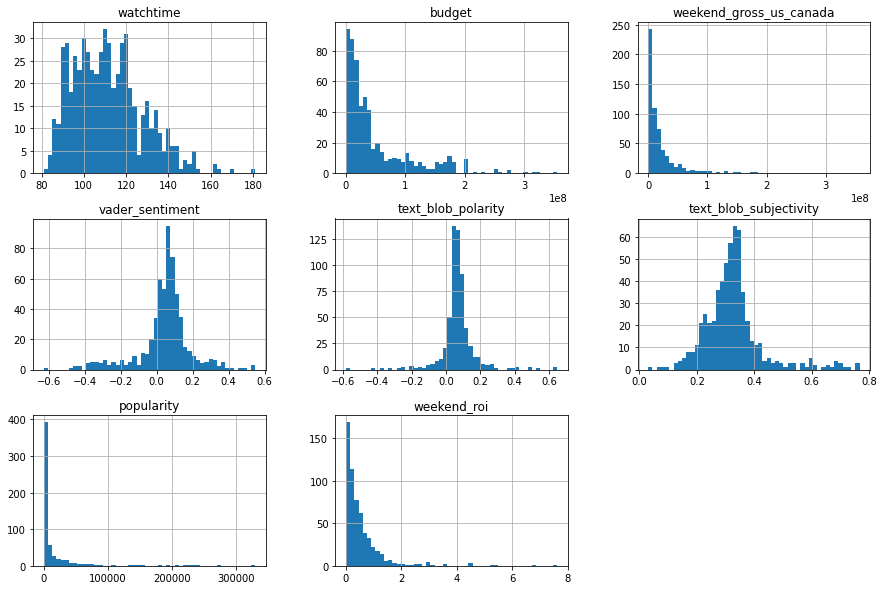

In [3]:
df_raw.hist(bins=50, figsize=(15, 10))

### Data Simplification and the Evaluation of the Correlations

This section discards the columns not used in our models (text information and weekend_roi) and displays the correlations between the data attribtues and the target column.

In [4]:
df = df_raw.copy()[["watchtime","budget","weekend_gross_us_canada","vader_sentiment", "text_blob_polarity", "text_blob_subjectivity", "popularity"]]

display(df)

,watchtime,budget,weekend_gross_us_canada,vader_sentiment,text_blob_polarity,text_blob_subjectivity,popularity
0,107.0,88000000.0,24632284.0,0.048495,0.062085,0.316292,35577.0
1,161.0,90000000.0,41082018.0,0.115208,0.070464,0.223233,7859.0
2,116.0,50000000.0,11203270.0,0.128721,0.094116,0.376873,37543.0
3,181.0,356000000.0,357115007.0,0.070877,0.050050,0.234112,218147.0
4,121.0,30000000.0,7534673.0,0.001378,0.031974,0.296877,239630.0
...,...,...,...,...,...,...,...
582,83.0,350000.0,68921.0,0.030950,0.051804,0.345523,8678.0
583,100.0,3000000.0,1729535.0,0.033001,0.058005,0.342593,23046.0
584,119.0,2700000.0,1503101.0,0.076392,0.090659,0.306311,21.0
585,108.0,8000000.0,700261.0,0.055454,-0.029009,0.130051,13.0


In [5]:
df.corr()["weekend_gross_us_canada"]

watchtime                  0.333539
budget                     0.772011
weekend_gross_us_canada    1.000000
vader_sentiment           -0.079474
text_blob_polarity        -0.026922
text_blob_subjectivity    -0.101486
popularity                 0.207180
Name: weekend_gross_us_canada, dtype: float64

In [6]:
df.corr("spearman")["weekend_gross_us_canada"]

watchtime                  0.176596
budget                     0.689901
weekend_gross_us_canada    1.000000
vader_sentiment            0.031362
text_blob_polarity        -0.003294
text_blob_subjectivity    -0.181848
popularity                 0.197747
Name: weekend_gross_us_canada, dtype: float64

As we can see, movie budget is strongly correlated with the openning weekend gross values. Movie run time (stored in the watchtime column) and popularity score (stored in the popularity column) attributes also show some positive correlation with weekend gross.

## Modeling Without Clustering

This section trains models without utilizing clustering - using different combinations of attributes in the data to evaluate the predictive power of different models and feature sets.

In [7]:
data = df[["watchtime","budget","vader_sentiment", "text_blob_polarity", "text_blob_subjectivity", "popularity", "weekend_gross_us_canada"]].copy()

#Normalize the features
for column in data.columns:
    if column != "weekend_gross_us_canada":
        data[column] = (data[column] - np.mean(data[column], axis=0))/np.std(data[column], axis=0)

#To be used for our models:
x_cols_meta = ["watchtime","budget"]
x_cols_pop = ["watchtime","budget","popularity"]
x_cols_pop_vader = ["watchtime","budget","popularity","vader_sentiment"]
x_cols_pop_blob = ["watchtime","budget","popularity","text_blob_polarity", "text_blob_subjectivity"]

y_col = "weekend_gross_us_canada"

cols = ["watchtime","budget","popularity", "vader_sentiment", "text_blob_polarity", "text_blob_subjectivity", "weekend_gross_us_canada"]

print('Data that will be used in our models for this question:\n')
display(data)

Data that will be used in our models for this question:



,watchtime,budget,vader_sentiment,text_blob_polarity,text_blob_subjectivity,popularity,weekend_gross_us_canada
0,-0.234676,0.625547,0.016489,-0.074470,-0.086843,0.532495,24632284.0
1,3.045198,0.659084,0.476087,0.014746,-0.993422,-0.204574,41082018.0
2,0.311970,-0.011653,0.569180,0.266598,0.503341,0.584774,11203270.0
3,4.259966,5.119487,0.170684,-0.202622,-0.887433,5.387346,357115007.0
4,0.615662,-0.347022,-0.308109,-0.395103,-0.275984,5.958616,7534673.0
...,...,...,...,...,...,...,...
582,-1.692397,-0.844206,-0.104380,-0.183946,0.197926,-0.182796,68921.0
583,-0.659845,-0.799769,-0.090255,-0.117914,0.169383,0.199274,1729535.0
584,0.494185,-0.804800,0.208679,0.229792,-0.184074,-0.413000,1503101.0
585,-0.173937,-0.715927,0.064432,-1.044455,-1.901204,-0.413213,700261.0


Now, we can build our models.

### Define the Generalized Functions for the Training and Evaluation of Models

In [8]:
def predict(data_train, data_test, x_cols, y_col, model_cons_func):
  data_train = data_train.copy()
  data_test = data_test.copy()

  X_train = (data_train[x_cols]).to_numpy()
  X_test = (data_test[x_cols]).to_numpy()
  y_train = (data_train[y_col]).to_numpy()
  y_test = (data_test[y_col]).to_numpy()

  model = model_cons_func().fit(X_train,y_train)
  rSqr = model.score(X_test,y_test)
  #error = metrics.mean_squared_error(y_test,model.predict(X_test))

  return(rSqr)

#Here, we run k-fold cross vlaidation multiple times
#and report the average of the "average score in between the folds"
#as well as the standard deviaton of such averages

#This approach largely stableizes the results.
#Hovever, general variability between runs with different random states should be noted.
#This is likely the result of the limited size of the dataset.

def k_fold_predict(data, x_cols, y_col, model_cons_func, n_folds = 5, n_repeats = 20):
  scores = [] #Average fold scores of each different run of k-fold cross-validation
  for i in range(0,n_repeats):
    data = data.copy()
    kf = KFold(n_splits=n_folds, shuffle = True)
    kf.get_n_splits(data)

    scores_iter = [] #Scores in each step of a single k-fold cross-validation
    for train_index, test_index in kf.split(data):
      data_train_k, data_test_k = data.iloc[train_index], data.iloc[test_index]
      scores_iter.append(predict(data_train_k, data_test_k, x_cols, y_col, model_cons_func))

    mean_score_iter = mean(scores_iter) #Mean score over the k folds
    scores.append(mean_score_iter)

  mean_score = mean(scores)
  score_std = stdev(scores)

  print('mean_score =',mean_score) #Average of all k-fold cross-validation averages
  print('score_std =',score_std) #Standard deviation of all k-fold cross-validationaverages
  print('')

### Train and Test Models

#### Modeling with just metadata

In [55]:
k_fold_predict(data, x_cols_meta, y_col, LinearRegression)

mean_score = 0.5470919713678847
score_std = 0.043080836565836264



In [10]:
k_fold_predict(data, x_cols_meta, y_col, RandomForestRegressor)

mean_score = 0.4697154199801733
score_std = 0.05716960258118694



In [11]:
k_fold_predict(data, x_cols_meta, y_col, AdaBoostRegressor)

mean_score = 0.5151085054572758
score_std = 0.07025468078320864



#### Modeling with metadata + population

In [12]:
k_fold_predict(data, x_cols_pop, y_col, LinearRegression)

mean_score = 0.5660661066074723
score_std = 0.022061575324429476



In [13]:
k_fold_predict(data, x_cols_pop, y_col, RandomForestRegressor)

mean_score = 0.5957599592006799
score_std = 0.04163540204310178



In [14]:
k_fold_predict(data, x_cols_pop, y_col, AdaBoostRegressor)

mean_score = 0.5453419633052093
score_std = 0.05157847057343988



#### Modeling with metadata + population + VADER sentiment


In [15]:
k_fold_predict(data, x_cols_pop_vader, y_col, LinearRegression)

mean_score = 0.5656359577367643
score_std = 0.023211410326427095



In [16]:
k_fold_predict(data, x_cols_pop_vader, y_col, RandomForestRegressor)

mean_score = 0.6059709988654756
score_std = 0.039818596756953754



In [17]:
k_fold_predict(data, x_cols_pop_vader, y_col, AdaBoostRegressor)

mean_score = 0.5098132949897886
score_std = 0.05618259621602384



#### Modeling with metadata + population + TextBlob sentiment

In [18]:
k_fold_predict(data, x_cols_pop_blob, y_col, LinearRegression)

mean_score = 0.5516019465955726
score_std = 0.033891940995118136



In [19]:
k_fold_predict(data, x_cols_pop_blob, y_col, RandomForestRegressor)

mean_score = 0.6034296148749156
score_std = 0.02842537990695004



In [20]:
k_fold_predict(data, x_cols_pop_blob, y_col, AdaBoostRegressor)

mean_score = 0.4889647217906388
score_std = 0.05601139759332414



### Visualizing the Results of an Example Random Forest Regression Model:



In [21]:
def RFR_Plot(data):
  rSqrList = []
  errorList = []
  betasList = []
  data_train, data_test = train_test_split(data, test_size=0.2)
  cols = data_train.iloc[:,:-1].columns
  X_train = data_train.iloc[:,:-1].to_numpy()
  X_test = data_test.iloc[:,:-1].to_numpy()
  y_train = data_train.iloc[:,-1]
  y_test = data_test.iloc[:,-1]

  model = RandomForestRegressor(n_estimators=100).fit(X_train,y_train)
  rSqr = model.score(X_test,y_test)
  error = metrics.mean_squared_error(y_test,model.predict(X_test))

  # Visualize: actual vs. predicted total (normalized) yearly compensation (from model)
  yHat = model.predict(X_test)
  plt.plot(yHat,y_test,'o',markersize=.75) 
  plt.xlabel('Prediction from model') 
  plt.ylabel('Actual total yearly compensation')  
  plt.title('R^2 = {:.4f}    |    RMSE = {:e}\n'.format(rSqr, error))
  plt.plot([0, 220000000], [0, 220000000])


Plotting an example Random Forest Regressor result for reference here (as this model/attribute set combination provided the best results for us):

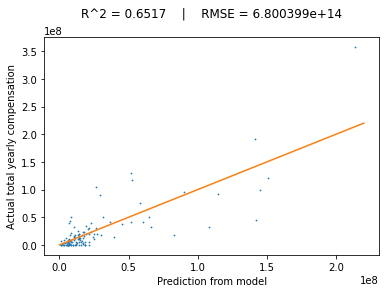

In [23]:
data_meta_pop_vader = data[x_cols_pop_vader + [y_col]].copy()
RFR_Plot(data_meta_pop_vader)

Please note that the performence of this single model is likely to change a lot between runs, and is only provided as an example.

## Exploration of Clustering

This section contains code that plots the data on scatter plots in which information that is relevant to the possibility of using clustering to improve results in marked.

Here, VADER sentiment information is used alongside metadata and popularity scores, while text_blob sentiment information is left out. We made this choice to illustrate the case with different numbers of clusters for a possible set of attributes. Similar results were observed for other combinations of features as well.


In [24]:
x_cols = ["watchtime","budget","vader_sentiment", "popularity"] #"text_blob_polarity", "text_blob_subjectivity", 
y_col = "weekend_gross_us_canada"
cols = x_cols + [y_col] 

data = df[cols].copy()

In [25]:
scaler = StandardScaler()
data[x_cols] = scaler.fit_transform(data[x_cols])

In [26]:
X = data[x_cols]
y = data[y_col]

### Here, we can see the highest-grossing movies on the opening weekend (movies with a US/Canada opening weekend gross of 100,000,000 USD or more) on a scatter-plot with axes for budget and watch time:

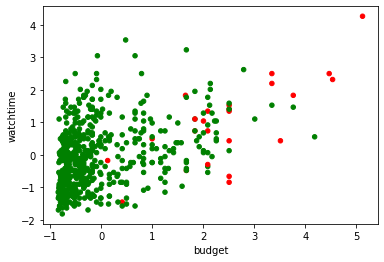

In [27]:
def getColor(x):
  if (x > 1e8):
    return 'r'
  else:
    return 'g'

data["color"] = data["weekend_gross_us_canada"].apply(getColor)
data.plot.scatter(x='budget', y='watchtime', c='color')

### Here, we see the resulting clusters from applying the k-means algorithm with k=2 (without using the target attribute) on a scatter-plot with axes for budget and watch time:

With this, we can argue that there is a possibility of having different optimal models in each cluster.

In [28]:
kmeans = KMeans(2)
data['kmeans_cluster'] = kmeans.fit_predict(X)

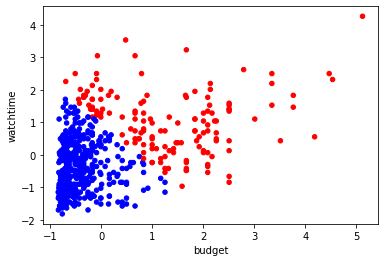

In [29]:
def getColor(x):
  if (x == 0):
    return 'r'
  elif (x==1):
    return 'b'
  else:
    return 'g'

data["color"] = data["kmeans_cluster"].apply(getColor)
data.plot.scatter(x='budget', y='watchtime', c='color')

We can notice how the target attribute ("weekend_gross_us_canada") has noticable different correlations with the other attributes in each cluster.

In [30]:
data_0 = data[data['kmeans_cluster'] == 0]
data_1 = data[data['kmeans_cluster'] == 1]

In [31]:
data_0.corr()["weekend_gross_us_canada"]#.sort_values(by="weekend_gross_us_canada", ascending = False)

watchtime                  0.138418
budget                     0.742133
vader_sentiment           -0.122213
popularity                 0.546091
weekend_gross_us_canada    1.000000
kmeans_cluster                  NaN
Name: weekend_gross_us_canada, dtype: float64

In [32]:
data_1.corr()["weekend_gross_us_canada"]

watchtime                 -0.078387
budget                     0.514692
vader_sentiment            0.025941
popularity                 0.062416
weekend_gross_us_canada    1.000000
kmeans_cluster                  NaN
Name: weekend_gross_us_canada, dtype: float64

### Now, analyzing potential values for k in clustering, we see the following graphs:

Text(0, 0.5, 'WCSS')

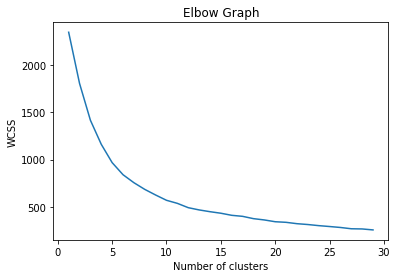

In [33]:
#Taken from: https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/
wcss=[]
for i in range(1,30):
  kmeans = KMeans(i)
  kmeans.fit(X)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,30)
plt.plot(number_clusters,wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Text(0, 0.5, 'Silhouette Score')

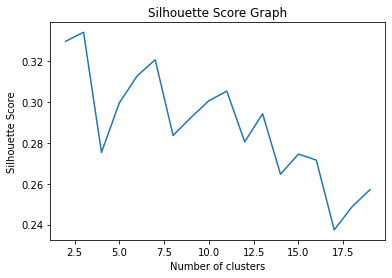

In [34]:
silhouette_scores = []
for i in range(2,20):
  kmeans = KMeans(i)
  labels = kmeans.fit_predict(X)
  silhouette_scores.append(silhouette_score(X, labels))

number_clusters = range(2,20)
#plt.ylabel('WCSS')
plt.plot(number_clusters,silhouette_scores)
plt.title('Silhouette Score Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

### Here, we see some descriptive statistics and plots for clusters inferred by the k-means algorithm using k=3 (without using the target attribute):

With this, it becomes apparent that the application of cluster-then-predict modeling has the potential to be successful as clusters show noticeably different relationships between attributes.

In [35]:
kmeans = KMeans(3)
data['kmeans_cluster'] = kmeans.fit_predict(X)

In [36]:
for i in range(0,3):
  print('i = ',i)
  display(data[data['kmeans_cluster']==i].corr()['weekend_gross_us_canada'].sort_values(ascending=False))
  print('---')
  print('')

i =  0


weekend_gross_us_canada    1.000000
budget                     0.518774
popularity                 0.077861
vader_sentiment            0.028908
watchtime                 -0.107864
kmeans_cluster                  NaN
Name: weekend_gross_us_canada, dtype: float64

---

i =  1


weekend_gross_us_canada    1.000000
budget                     0.746469
popularity                 0.315697
watchtime                 -0.001818
vader_sentiment           -0.179071
kmeans_cluster                  NaN
Name: weekend_gross_us_canada, dtype: float64

---

i =  2


weekend_gross_us_canada    1.000000
budget                     0.977065
watchtime                  0.869373
vader_sentiment            0.282491
popularity                -0.069225
kmeans_cluster                  NaN
Name: weekend_gross_us_canada, dtype: float64

---



In [37]:
data['kmeans_cluster'].unique()

array([0, 1, 2], dtype=int32)

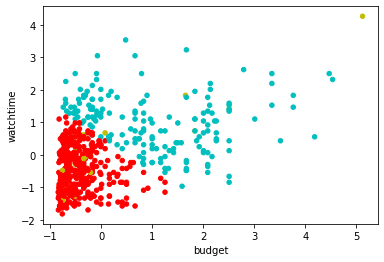

In [38]:
def getColor(x):
  if (x == 0):
    return 'r'
  elif (x==1):
    return 'c'
  elif (x==2):
    return 'y'
  elif (x==3):
    return 'b'
  else:
    return 'g'

data["color"] = data["kmeans_cluster"].apply(getColor)
data.plot.scatter(x='budget', y='watchtime', c='color')

In [39]:
for i in range(0,3):
  print('i = ',i)
  display(data[data['kmeans_cluster']==i]['weekend_gross_us_canada'].describe())
  print('---')
  print('')

i =  0


count    3.910000e+02
mean     1.093821e+07
std      1.437876e+07
min      1.044000e+03
25%      1.182394e+06
50%      6.864744e+06
75%      1.504082e+07
max      1.324346e+08
Name: weekend_gross_us_canada, dtype: float64

---

i =  1


count    1.750000e+02
mean     4.234857e+07
std      4.765007e+07
min      2.284900e+04
25%      1.089802e+07
50%      2.685873e+07
75%      5.562994e+07
max      2.576982e+08
Name: weekend_gross_us_canada, dtype: float64

---

i =  2


count    2.100000e+01
mean     5.180153e+07
std      8.898194e+07
min      1.440760e+05
25%      5.527410e+06
50%      1.603022e+07
75%      2.754787e+07
max      3.571150e+08
Name: weekend_gross_us_canada, dtype: float64

---



## Cluster-Then-Predict Models

This section trains models that utilize both clustering and regression - using different combinations of attributes in the data to evaluate the predictive power of different models and feature sets.

### Define the Needed Functions:

First, we can define a general function to apply the cluster and predict method:



In [40]:
def cluster_and_predict(data_train, data_test, x_cols, y_col, model_cons_func, max_num_clusters = 10, display_plot = False):
  data_train = data_train.copy()
  data_test = data_test.copy()

  #Standardize the data columns (after fitting on the training set)
  scaler = StandardScaler()
  data_train[x_cols] = scaler.fit_transform(data_train[x_cols])
  X_cluster_train = data_train[x_cols] #to be used for clustering

  #Use the trained scaler to transfor me test set into the same vector space
  data_test[x_cols] = scaler.transform(data_test[x_cols])
  X_cluster_test = data_test[x_cols] #to be used for clustering


  #Determine the optimal number of clusters and the associated cluster assignments
  max_silhouette_score = 0
  kmeans = KMeans(1)#dummy value for 1 cluster, will likely be changed
  labels = kmeans.fit_predict(X_cluster_train) #dummy value for 1 cluster, will likely be changed
  k = 1 #optimum k found
  for i in range(2,max_num_clusters+1):
    kmeans_iter = KMeans(i)
    labels_iter = kmeans_iter.fit_predict(X_cluster_train)
    score = silhouette_score(X_cluster_train, labels_iter)
    if score > max_silhouette_score:
      k = i
      kmeans = kmeans_iter
      labels = labels_iter
      max_silhouette_score = score
  
  #print('number of clusters determined :', k)

  data_train['cluster'] = labels

  #Predict clusters for each row in the test set
  data_test['cluster'] = kmeans.predict(X_cluster_test)
  X_test = (data_test[x_cols])

  #Train models for each cluster and predict
  models = []
  y_test_clustered = np.array([])
  y_pred_clustered = np.array([])
  for i in range(0,k):
    X_train_i = ((data_train[data_train['cluster'] == i])[x_cols]).to_numpy()
    y_train_i = (data_train[data_train['cluster'] == i])[y_col]
    model = model_cons_func()
    model.fit(X_train_i,y_train_i)
    models.append(model)

    num_test_rows = len(data_test[data_test['cluster'] == i])

    if(num_test_rows>0):
      actual = ((data_test[data_test['cluster'] == i])[y_col]).to_numpy()
      y_test_clustered = np.concatenate([y_test_clustered, actual])

      predicted = model.predict(((data_test[data_test['cluster'] == i])[x_cols]).to_numpy())
      y_pred_clustered = np.concatenate([y_pred_clustered, predicted])

  score = metrics.r2_score(y_test_clustered, y_pred_clustered)

  if  display_plot:
    plt.scatter(y_test_clustered, y_pred_clustered)
    plt.title('Prediction Results\nR^2 = '+str(score))
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.show()

  return score

Now, let us define a function to use cross validation to evaluate the performence of our model:

In [41]:
#Using some code from the documentation:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

#Here, we run k-fold cross vlaidation multiple times
#and report the average of the "average score in between the folds"
#as well as the standard deviaton of such averages

#This approach largely stableizes the results.
#Hovever, general variability between runs with different random states should be noted.
#This is likely the result of the limited size of the dataset.

def k_fold_cluster_and_predict(data, x_cols, y_col, model_cons_func, n_folds = 5, n_repeats = 20):
  scores = [] #Average fold scores of each different run of k-fold cross-validation
  for i in range(0,n_repeats):
    data = data.copy()
    kf = KFold(n_splits=n_folds, shuffle = True)
    kf.get_n_splits(data)

    scores_iter = [] #Scores in each step of a single k-fold cross-validation
    for train_index, test_index in kf.split(data):
      data_train_k, data_test_k = data.iloc[train_index], data.iloc[test_index]
      scores_iter.append(cluster_and_predict(data_train_k, data_test_k, x_cols, y_col, model_cons_func))

    mean_score_iter = mean(scores_iter) #Mean score over the k folds
    scores.append(mean_score_iter)

  mean_score = mean(scores)
  score_std = stdev(scores)

  print('mean_score =',mean_score) #Average of all k-fold cross-validation averages
  print('score_std =',score_std) #Standard deviation of all k-fold cross-validationaverages
  print('')

### Prepare The Needed Variables

In [42]:
x_cols_meta = ["watchtime","budget"]
x_cols_pop = ["watchtime","budget","popularity"]
x_cols_pop_vader = ["watchtime","budget","popularity","vader_sentiment"]
x_cols_pop_blob = ["watchtime","budget","popularity","text_blob_polarity", "text_blob_subjectivity"]

y_col = "weekend_gross_us_canada"

cols = ["watchtime","budget","popularity", "vader_sentiment", "text_blob_polarity", "text_blob_subjectivity", "weekend_gross_us_canada"]

data = df[cols].copy()

### Train and Test Models

#### Modeling with just metadata

In [43]:
k_fold_cluster_and_predict(data, x_cols_meta, y_col, LinearRegression)

mean_score = 0.5867396533872434
score_std = 0.029435815096566297



In [44]:
k_fold_cluster_and_predict(data, x_cols_meta, y_col, RandomForestRegressor)

mean_score = 0.4630963002428956
score_std = 0.05328990311023847



In [45]:
k_fold_cluster_and_predict(data, x_cols_meta, y_col, AdaBoostRegressor)

mean_score = 0.5214244863974116
score_std = 0.05426000440725154



#### Modeling with metadata + population

In [46]:
k_fold_cluster_and_predict(data, x_cols_pop, y_col, LinearRegression)

mean_score = 0.6406128152989953
score_std = 0.04256177174088249



In [47]:
k_fold_cluster_and_predict(data, x_cols_pop, y_col, RandomForestRegressor)

mean_score = 0.5622237842116158
score_std = 0.032956899927290756



In [48]:
k_fold_cluster_and_predict(data, x_cols_pop, y_col, AdaBoostRegressor)

mean_score = 0.5479630035495732
score_std = 0.03667767114154214



#### Modeling with metadata + population + VADER sentiment

In [49]:
k_fold_cluster_and_predict(data, x_cols_pop_vader, y_col, LinearRegression)

mean_score = 0.6183699854826336
score_std = 0.05314769293190842



In [50]:
k_fold_cluster_and_predict(data, x_cols_pop_vader, y_col, RandomForestRegressor)

mean_score = 0.5519534389521799
score_std = 0.04464444736187534



In [51]:
k_fold_cluster_and_predict(data, x_cols_pop_vader, y_col, AdaBoostRegressor)


mean_score = 0.5136809483200391
score_std = 0.038461206409001525



#### Modeling with metadata + population + TextBlob sentiment

In [52]:
k_fold_cluster_and_predict(data, x_cols_pop_blob, y_col, LinearRegression)

mean_score = 0.6292302934328433
score_std = 0.039676045770618305



In [56]:
k_fold_cluster_and_predict(data, x_cols_pop_blob, y_col, RandomForestRegressor)

mean_score = 0.5363693773513492
score_std = 0.047657734094376056



In [54]:
k_fold_cluster_and_predict(data, x_cols_pop_blob, y_col, AdaBoostRegressor)

mean_score = 0.5009586893338014
score_std = 0.054630752881424244

